In [78]:
import pandas as pd
df = pd.read_csv('superstore_data.csv')
df.head()

,Id,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,55,Graduation,Divorced,84835.0,0,0,0,189,104,...,111,189,218,1,4,4,6,1,1,0
1,1,64,Graduation,Single,57091.0,0,0,0,464,5,...,7,0,37,1,7,3,7,5,1,0
2,10476,67,Graduation,Married,67267.0,0,1,0,134,11,...,15,2,30,1,3,2,5,2,0,0
3,1386,58,Graduation,Together,32474.0,1,1,0,10,0,...,0,0,0,1,1,0,2,7,0,0
4,5371,36,Graduation,Single,21474.0,1,0,0,6,16,...,11,0,34,2,3,1,2,7,1,0


In [79]:
df.isnull().sum()

Id                      0
Age                     0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [80]:
df['Income'].fillna(df['Income'].mean())

0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name: Income, Length: 2240, dtype: float64

In [81]:
df.describe()

,Id,Age,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,56.194196,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391
min,0.000000,29.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,48.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,55.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,66.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,132.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


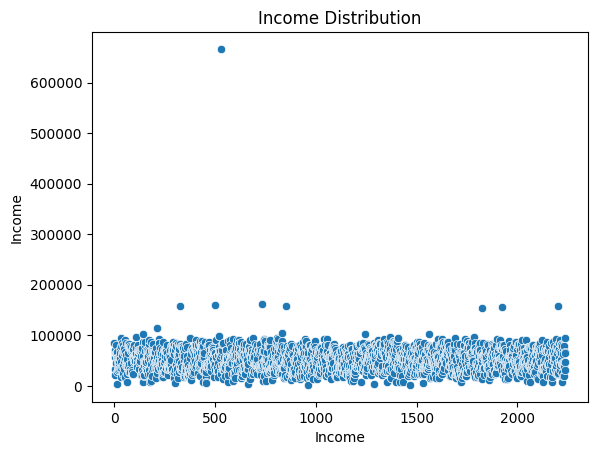

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(df['Income'])
plt.title('Income Distribution')
plt.xlabel('Income')
plt.show()

In [83]:
# Replace the outliers in the 'Income' column with the mean of that column

# Calculate IQR and Identify Outliers
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (df['Income'] < lower_bound) | (df['Income'] > upper_bound)
print(f"Outliers detected: {outliers.sum()}")

Outliers detected: 8


In [84]:
# Replace Outliers with Mean Value
mean_income = df['Income'].mean()
df.loc[outliers, 'Income'] = mean_income

print(df['Income'].describe())

count      2216.000000
mean      51635.853344
std       20675.969815
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68179.500000
max      113734.000000
Name: Income, dtype: float64


In [85]:
df.rename(columns={
    'MntWines': 'wines',
    'MntFruits': 'fruits',
    'MntMeatProducts': 'meat_products',
    'MntFishProducts': 'fish_products',
    'MntSweetProducts': 'sweet_products',
    'MntGoldProds': 'gold_products'
}, inplace=True)

# Verify the column names after renaming
print(df.columns)

Index(['Id', 'Age', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'wines', 'fruits', 'meat_products',
       'fish_products', 'sweet_products', 'gold_products', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Response', 'Complain'],
      dtype='object')


In [86]:
products_cols = ['wines', 'fruits', 'meat_products',
       'fish_products', 'sweet_products', 'gold_products']

for col in products_cols:
    df[col] = (df[col] > 0).astype(int)

In [87]:
!pip install mlxtend


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [88]:
df = df.T

df.head(6)

,0,1,2,3,4,5,6,7,8,9,...,2230,2231,2232,2233,2234,2235,2236,2237,2238,2239
Id,1826,1,10476,1386,5371,7348,4073,1991,4047,9477,...,3363,8595,7232,7829,9977,10142,5263,22,528,4070
Age,55,64,67,58,36,67,71,58,71,71,...,51,52,52,125,52,49,48,49,47,56
Education,Graduation,Graduation,Graduation,Graduation,Graduation,PhD,2n Cycle,Graduation,PhD,PhD,...,2n Cycle,Graduation,Graduation,2n Cycle,Graduation,PhD,2n Cycle,Graduation,Graduation,PhD
Marital_Status,Divorced,Single,Married,Together,Single,Single,Married,Together,Married,Married,...,Married,Widow,Widow,Divorced,Divorced,Divorced,Married,Divorced,Married,Married
Income,84835.0,57091.0,67267.0,32474.0,21474.0,71691.0,63564.0,44931.0,65324.0,65324.0,...,20130.0,42429.0,42429.0,36640.0,78901.0,66476.0,31056.0,46310.0,65819.0,94871.0
Kidhome,0,0,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0


In [89]:
transactions =  df.apply(lambda x: x.dropna().tolist()) 

transactions

0       [1826, 55, Graduation, Divorced, 84835.0, 0, 0...
1       [1, 64, Graduation, Single, 57091.0, 0, 0, 0, ...
2       [10476, 67, Graduation, Married, 67267.0, 0, 1...
3       [1386, 58, Graduation, Together, 32474.0, 1, 1...
4       [5371, 36, Graduation, Single, 21474.0, 1, 0, ...
                              ...                        
2235    [10142, 49, PhD, Divorced, 66476.0, 0, 1, 99, ...
2236    [5263, 48, 2n Cycle, Married, 31056.0, 1, 0, 9...
2237    [22, 49, Graduation, Divorced, 46310.0, 1, 0, ...
2238    [528, 47, Graduation, Married, 65819.0, 0, 0, ...
2239    [4070, 56, PhD, Married, 94871.0, 0, 2, 99, 1,...
Length: 2240, dtype: object

In [90]:
transactions = transactions.tolist()
transactions

[[1826,
  55,
  'Graduation',
  'Divorced',
  84835.0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  4,
  4,
  6,
  1,
  1,
  0],
 [1,
  64,
  'Graduation',
  'Single',
  57091.0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  7,
  3,
  7,
  5,
  1,
  0],
 [10476,
  67,
  'Graduation',
  'Married',
  67267.0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  3,
  2,
  5,
  2,
  0,
  0],
 [1386,
  58,
  'Graduation',
  'Together',
  32474.0,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  2,
  7,
  0,
  0],
 [5371,
  36,
  'Graduation',
  'Single',
  21474.0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  2,
  3,
  1,
  2,
  7,
  1,
  0],
 [7348,
  67,
  'PhD',
  'Single',
  71691.0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  4,
  7,
  5,
  2,
  1,
  0],
 [4073,
  71,
  '2n Cycle',
  'Married',
  63564.0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  10,
  10,
  7,
  6,
  1,
  0],
 [1991,
  58,
  'Graduation',
  'Together',
  44931.0,
  0,
  1,


In [91]:
from mlxtend.preprocessing import TransactionEncoder

# Sample transactions data (list of lists, each list is a transaction)
transactions = [
    ['wines', 'fruits', 'meat_products'],
    ['meat_products', 'fish_products'],
    ['wines', 'fish_products', 'sweet_products'],
    ['fruits', 'gold_products']
]

# Initialize the TransactionEncoder
te = TransactionEncoder()

# Fit the encoder to the transactions data
te_model = te.fit(transactions)

# Transform the transactions data
rows = te_model.transform(transactions)

# Convert the transformed data into a DataFrame
df_transactions = pd.DataFrame(rows, columns=te_model.columns_)

# Show the result
print(df_transactions)

   fish_products  fruits  gold_products  meat_products  sweet_products  wines
0          False    True          False           True           False   True
1           True   False          False           True           False  False
2           True   False          False          False            True   True
3          False    True           True          False           False  False


In [92]:
df_transactions.head()

,fish_products,fruits,gold_products,meat_products,sweet_products,wines
0,False,True,False,True,False,True
1,True,False,False,True,False,False
2,True,False,False,False,True,True
3,False,True,True,False,False,False


In [93]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(df_transactions, min_support=0.005, use_colnames=True)

frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

frequent_itemsets

,support,itemsets,length
0,0.50,(fish_products),1
1,0.50,(fruits),1
2,0.25,(gold_products),1
3,0.50,(meat_products),1
4,0.25,(sweet_products),1
5,0.50,(wines),1
6,0.25,"(meat_products, fish_products)",2
7,0.25,"(sweet_products, fish_products)",2
8,0.25,"(wines, fish_products)",2
9,0.25,"(fruits, gold_products)",2


In [94]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.55)

rules = rules.sort_values(['confidence'], ascending= [False])

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(sweet_products),(fish_products),0.25,0.50,0.25,1.0,2.0,1.0,0.1250,inf,0.666667,0.5,1.0,0.75
1,(gold_products),(fruits),0.25,0.50,0.25,1.0,2.0,1.0,0.1250,inf,0.666667,0.5,1.0,0.75
2,(sweet_products),(wines),0.25,0.50,0.25,1.0,2.0,1.0,0.1250,inf,0.666667,0.5,1.0,0.75
3,"(wines, sweet_products)",(fish_products),0.25,0.50,0.25,1.0,2.0,1.0,0.1250,inf,0.666667,0.5,1.0,0.75
4,"(fish_products, sweet_products)",(wines),0.25,0.50,0.25,1.0,2.0,1.0,0.1250,inf,0.666667,0.5,1.0,0.75
5,"(wines, fish_products)",(sweet_products),0.25,0.25,0.25,1.0,4.0,1.0,0.1875,inf,1.000000,1.0,1.0,1.00
6,(sweet_products),"(wines, fish_products)",0.25,0.25,0.25,1.0,4.0,1.0,0.1875,inf,1.000000,1.0,1.0,1.00
7,"(meat_products, fruits)",(wines),0.25,0.50,0.25,1.0,2.0,1.0,0.1250,inf,0.666667,0.5,1.0,0.75
8,"(meat_products, wines)",(fruits),0.25,0.50,0.25,1.0,2.0,1.0,0.1250,inf,0.666667,0.5,1.0,0.75
9,"(fruits, wines)",(meat_products),0.25,0.50,0.25,1.0,2.0,1.0,0.1250,inf,0.666667,0.5,1.0,0.75


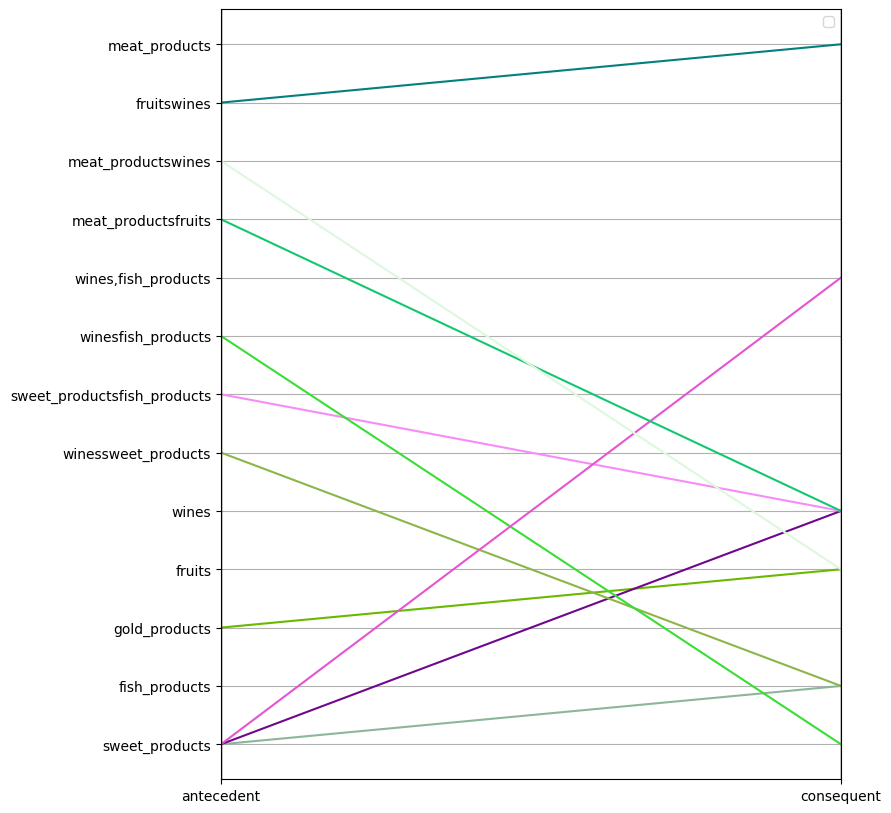

In [118]:
from matplotlib import pyplot as plt
from pandas.plotting import parallel_coordinates

rules['antecedent'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))

rules['consequent'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

rules['rule_n'] = rules.index

coords=rules[['antecedent','consequent','rule_n']]

plt.figure(figsize=(8,10))

parallel_coordinates(coords, 'rule_n')

plt.legend([])

plt.grid(True)
plt.show()


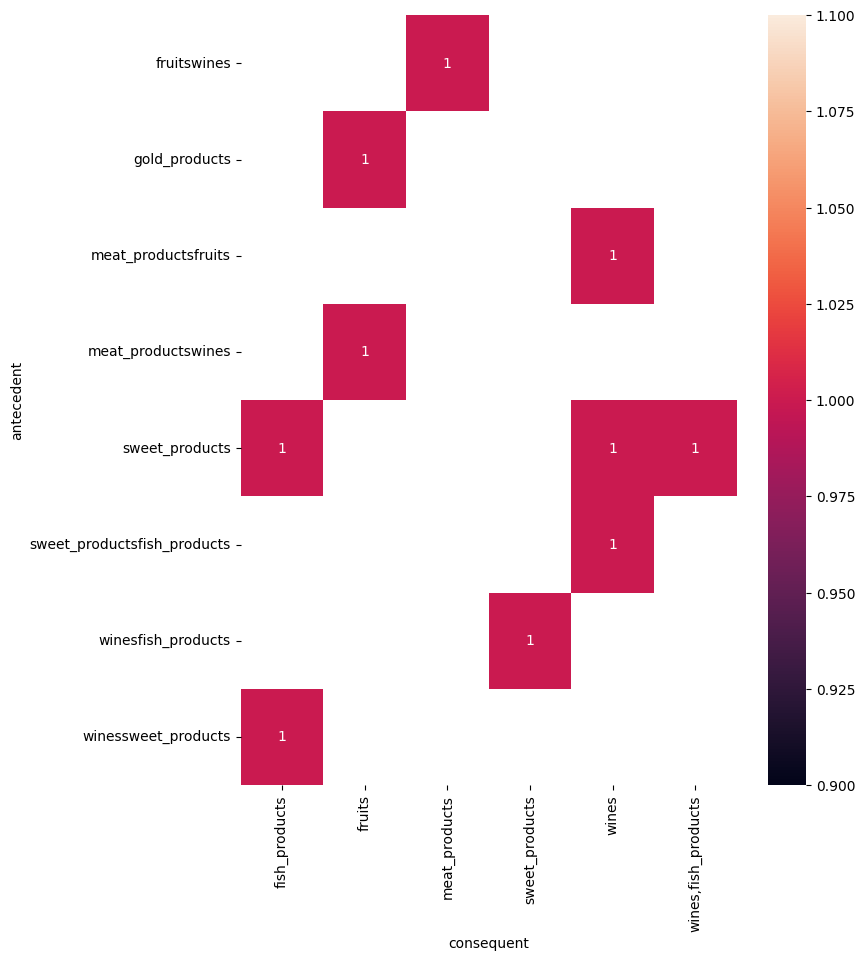

In [119]:
import seaborn as sns

pivot = rules.pivot(index = 'antecedent', columns = 'consequent', values= 'confidence')

plt.figure(figsize=(8,10))

sns.heatmap(pivot, annot = True)

plt.yticks(rotation=0)

plt.xticks(rotation=90)
plt.show()

In [120]:
def predict(items, rules, max_results= 6):
    
    preds = rules[rules['antecedents'] == items]
    
    preds = preds[['consequent','confidence']]
    
    preds.sort_values('confidence', ascending=False)
    
    return preds[:max_results]

In [122]:
preds = predict({'sweet_products', 'wines'}, rules)
preds

,consequent,confidence
3,fish_products,1.0
